# Explainable ML

### Modules and Libraries

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import shap
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
#merged_df = pd.read_table('/Users/naifganadily/Desktop/Artificial Intelligence for Precision Nutrition Bootcamp/gut-microbiome-precision-nutrition/data/results/merged.hmp.h1.truth.cleaned.txt', index_col=0)
merged_df = pd.read_table('merged.hmp.h1.truth.cleaned.txt', index_col=0)

In [ ]:
merged_df.head()

,Sex,Age,Class,BMI,Race,IR_IS,SSPG,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae
SubjectID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZJTKAE3,F,58.65,Control,31.24,C,IR,162.0,0.013645,0.582611,0.298357,0.104188,0.000128,0.000663,0.013645,0.000969,0.582611,0.044149,0.270736,0.013518,0.010253,0.000765,0.016374,0.000128,0.000663,0.000025,0.582611,0.044149,0.270736,0.012829,0.013518,0.000765,0.010253,0.000408,0.016374,0.000128,0.000663,0.000025,0.016272,0.535579,0.002117,0.000663,0.012829,0.013518,0.000765,0.010253,0.114058,0.000434,0.033514,0.000025,0.013492,0.149485,0.000383,0.044149,0.000102,0.000128,0.000663,0.003902,0.000025,0.000128,0.013492,0.000281,0.000179,0.535579,0.000000,0.013518,0.019690,0.001709,0.000025,0.000204,0.000434,0.000663,0.003877,0.002219,0.002117,0.000077,0.002755,0.010176,0.003061,0.000510,0.119516,0.004948,0.000179,0.044532,0.002857,0.008417,0.026933,0.044149,0.016272,0.000000,0.000459,0.000025,0.000153,0.000383,0.000102,0.000663,0.003902,0.000408,0.008952,0.008697,0.000025,0.030657,0.003698,0.013798
ZJXC41N,F,49.69,Prediabetic,28.24,B,IS,75.0,0.002822,0.260515,0.663827,0.008572,0.000106,0.063997,0.002822,0.000000,0.260515,0.008359,0.651954,0.000160,0.006868,0.000053,0.002289,0.000106,0.063997,0.002715,0.260515,0.008306,0.651901,0.002715,0.000160,0.000053,0.006868,0.000000,0.002289,0.000106,0.063997,0.002715,0.000692,0.090406,0.000000,0.000532,0.002715,0.000160,0.000053,0.006868,0.108615,0.001757,0.032318,0.005005,0.123416,0.212863,0.000000,0.007986,0.001597,0.000106,0.063997,0.320786,0.002715,0.000106,0.123416,0.000426,0.000213,0.090406,0.000000,0.000053,0.005218,0.002183,0.002715,0.001065,0.001757,0.000053,0.

In [ ]:
# Add the columns to a list to be easily integrated
encoding_columns = ['Sex', 'Class', 'Race', 'IR_IS']
func_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = func_encoder.fit_transform(merged_df[encoding_columns])
encoded_columns = pd.DataFrame(encoded_columns, columns=func_encoder.get_feature_names_out(encoding_columns))

merged_df = merged_df.drop(columns=encoding_columns)
df_onehot = pd.concat([merged_df.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

display(df_onehot)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,BMI,SSPG,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H,IR_IS_IS
0,58.65,31.24,162.00,0.013645,0.582611,0.298357,0.104188,0.000128,0.000663,0.013645,0.000969,0.582611,0.044149,0.270736,0.013518,0.010253,0.000765,0.016374,0.000128,0.000663,0.000025,0.582611,0.044149,0.270736,0.012829,0.013518,0.000765,0.010253,0.000408,0.016374,0.000128,0.000663,0.000025,0.016272,0.535579,0.002117,0.000663,0.012829,0.013518,0.000765,0.010253,0.114058,0.000434,0.033514,0.000025,0.013492,0.149485,0.000383,0.044149,0.000102,0.000128,0.000663,0.003902,0.000025,0.000128,0.013492,0.000281,0.000179,0.535579,0.000000,0.013518,0.019690,0.001709,0.000025,0.000204,0.000434,0.000663,0.003877,0.002219,0.002117,0.000077,0.002755,0.010176,0.003061,0.000510,0.119516,0.004948,0.000179,0.044532,0.002857,0.008417,0.026933,0.044149,0.016272,0.000000,0.000459,0.000025,0.000153,0.000383,0.000102,0.000663,0.003902,0.000408,0.008952,0.008697,0.000025,0.030657,0.003698,0.013798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,49.69,28.24,75.00,0.002822,0.260515,0.663827,0.008572,0.000106,0.063997,0.002822,0.000000,0.260515,0.008359,0.651954,0.000160,0.006868,0.000053,0.002289,0.000106,0.063997,0.002715,0.260515,0.008306,0.651901,0.002715,0.000160,0.000053,0.006868,0.000000,0.002289,0.000106,0.063997,0.002715,0.000692,0.090406,0.000000,0.000532,0.002715,0.000160,0.000053,0.006868,0.108615,0.001757,0.032318,0.005005,0.123416,0.212863,0.000000,0.007986,0.001597,0.000106,0.063997,0.320786,0.002715,0.000106,0.123416,0.000426,0.000213,0.090406,0.000000,0.000053,0.005218,0.002183,0.002715,0.001065,0.001757,0.000053,0.000799,0.000639,0.000000,0.001917,0.002662,0.001810,0.000266,

In [ ]:
df_onehot = df_onehot.drop(columns=['SSPG'])

In [ ]:
X = df_onehot.drop(columns=['IR_IS_IS'])
y = df_onehot['IR_IS_IS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
demographics = ['Age', 'BMI']
onehotencoded_columns = ['Sex_M', 'Class_Crossover', 'Class_Diabetic', 'Class_Prediabetic', 'Race_B', 'Race_C', 'Race_H']
phylum_columns = ['phylum_Actinobacteria', 'phylum_Bacteroidetes', 'phylum_Firmicutes', 'phylum_Proteobacteria', 'phylum_Verrucomicrobia', 'phylum_unclassified_Bacteria']
genus_columns = ['genus_Akkermansia', 'genus_Alistipes', 'genus_Anaerotruncus', 'genus_Anaerovorax', 'genus_Bacteroides', 'genus_Barnesiella', 'genus_Bilophila', 'genus_Blautia', 'genus_Butyricicoccus', 'genus_Butyricimonas', 'genus_Clostridium.IV', 'genus_Clostridium.XI', 'genus_Clostridium.XVIII', 'genus_Clostridium.XlVa', 'genus_Clostridium.XlVb', 'genus_Clostridium.sensu.stricto', 'genus_Collinsella', 'genus_Coprococcus', 'genus_Dorea', 'genus_Eggerthella', 'genus_Erysipelotrichaceae_incertae_sedis', 'genus_Faecalibacterium', 'genus_Flavonifractor', 'genus_Holdemania', 'genus_Lachnospiracea_incertae_sedis', 'genus_Odoribacter', 'genus_Oscillibacter', 'genus_Parabacteroides', 'genus_Parasutterella', 'genus_Phascolarctobacterium', 'genus_Prevotella', 'genus_Pseudoflavonifractor', 'genus_Roseburia', 'genus_Ruminococcus', 'genus_Streptococcus', 'genus_Veillonella', 'genus_unclassified_Bacteria', 'genus_unclassified_Clostridiales', 'genus_unclassified_Clostridiales_Incertae.Sedis.XIII', 'genus_unclassified_Coriobacteriaceae', 'genus_unclassified_Erysipelotrichaceae', 'genus_unclassified_Firmicutes', 'genus_unclassified_Lachnospiraceae', 'genus_unclassified_Porphyromonadaceae', 'genus_unclassified_Ruminococcaceae']
order_columns = ['order_Bacteroidales', 'order_Burkholderiales', 'order_Clostridiales',  'order_Coriobacteriales', 'order_Desulfovibrionales', 'order_Enterobacteriales', 'order_Erysipelotrichales', 'order_Lactobacillales', 'order_Selenomonadales', 'order_Verrucomicrobiales', 'order_unclassified_Bacteria', 'order_unclassified_Firmicutes']
family_columns = ['family_Acidaminococcaceae', 'family_Bacteroidaceae', 'family_Clostridiaceae.1', 'family_Clostridiales_Incertae.Sedis.XIII', 'family_Coriobacteriaceae', 'family_Desulfovibrionaceae', 'family_Enterobacteriaceae', 'family_Erysipelotrichaceae', 'family_Lachnospiraceae', 'family_Peptostreptococcaceae', 'family_Porphyromonadaceae', 'family_Prevotellaceae', 'family_Rikenellaceae', 'family_Ruminococcaceae', 'family_Streptococcaceae', 'family_Sutterellaceae', 'family_Veillonellaceae', 'family_Verrucomicrobiaceae', 'family_unclassified_Bacteria', 'family_unclassified_Clostridiales', 'family_unclassified_Firmicutes']
class_columns = ['class_Actinobacteria', 'class_Bacilli', 'class_Bacteroidia', 'class_Betaproteobacteria', 'class_Clostridia', 'class_Deltaproteobacteria', 'class_Erysipelotrichia', 'class_Gammaproteobacteria', 'class_Negativicutes', 'class_Verrucomicrobiae', 'class_unclassified_Bacteria', 'class_unclassified_Firmicutes']

In [ ]:
scaler = StandardScaler()
X_train[demographics] = scaler.fit_transform(X_train[demographics])
X_test[demographics] = scaler.transform(X_test[demographics])

### Trying Different Normalization for Microbiome Data

In [ ]:
microbiome_columns = [col for col in X_train.columns if col not in demographics and col not in onehotencoded_columns]

#### CLR + pseudo count

In [ ]:
# To avoid zeros in the microbiome data
X_train[microbiome_columns] = X_train[microbiome_columns] + 1e-6
X_test[microbiome_columns] = X_test[microbiome_columns] + 1e-6
# CLR transformation
X_train[microbiome_columns] = np.log(X_train[microbiome_columns].div(X_train[microbiome_columns].sum(axis=1), axis=0))
X_test[microbiome_columns] = np.log(X_test[microbiome_columns].div(X_test[microbiome_columns].sum(axis=1), axis=0))

**I Skipped this for now:**

In [ ]:
# X_train[microbiome_columns] = X_train[microbiome_columns].div(X_train[microbiome_columns].sum(axis=1), axis=0)
# X_test[microbiome_columns] = X_test[microbiome_columns].div(X_test[microbiome_columns].sum(axis=1), axis=0)

### Here is where you can change which features to use and not to use

In [ ]:
columns_keep = demographics + onehotencoded_columns + genus_columns
X_train = X_train[columns_keep]
X_test = X_test[columns_keep]

In [ ]:
display(X_train.head())
display(X_test.head())

,Age,BMI,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae
36,-2.236158,-1.624119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-15.404636,-3.334920,-8.455180,-9.918326,-3.211542,-15.404636,-8.717256,-6.578290,-7.465384,-6.405844,-8.622059,-6.960430,-7.929479,-7.619475,-7.465384,-8.381140,-7.409833,-15.404636,-7.619475,-9.227250,-10.321717,-3.254243,-6.510092,-9.227250,-4.656316,-7.259598,-4.327749,-4.824619,-8.622059,-5.990569,-15.404636,-8.622059,-7.929479,-8.940088,-10.321717,-10.321717,-7.653362,-6.477661,-9.918326,-6.877756,-7.801713,-9.073398,-6.267391,-7.283122,-3.845589
31,-0.471859,2.583076,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-15.414344,-6.745489,-9.467623,-10.158157,-5.132915,-2.858532,-9.467623,-5.518946,-8.775783,-10.845838,-9.467623,-8.552902,-10.158157,-7.911544,-8.775783,-15.414344,-7.006164,-7.218673,-6.593707,-9.754434,-7.390471,-3.933880,-10.845838,-10.845838,-4.337372,-9.754434,-5.331040,-6.830996,-8.083290,-5.588622,-15.414344,-10.158157,-5.418410,-15.414344,-10.845838,-10.845838,-5.225285,-3.423453,-10.158157,-8.775783,-6.830996,-8.216728,-4.049694,-6.281716,-4.104252
8,1.503600,0.078539,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.772833,-6.240569,-9.558763,-9.765737,-3.554371,-7.174922,-9.113515,-4.887048,-8.114054,-15.405993,-7.879358,-4.548919,-11.617269,-8.722074,-10.715582,-6.640355,-15.405993,-7.035694,-5.106547,-9.498307,-9.441301,-5.416492,-9.074367,-8.159144,-4.314615,-9.154261,-5.838908,-6.887306,-11.220894,-5.391076,-10.534789,-7.989837,-5.201709,-5.185076,-5.266884,-9.623110,-5.737035,-5.240800,-7.296990,-7.538070,-5.781670,-6.853412,-4.143045,-10.936643,-3.469349
17,-0.405177,0.546302,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-4.036019,-4.305899,-10.389911,-10.236690,-2.550724,-6.549733,-9.413173,-6.155047,-7.924992,-15.419911,-12.150342,-8.449619,-8.498362,-8.127105,-8.721259,-15.419911,-7.968140,-7.592710,-7.553116,-15.419911,-9.881703,-4.362568,-8.498362,-12.150342,-4.620862,-5.965574,-6.184244,-5.887370,-5.197935,-15.419911,-15.419911,-10.236690,-6.242704,-5.740860,-8.217192,-9.881703,-4.562126,-5.287458,-9.241714,-7.505732,-10.389911,-6.889714,-4.611086,-15.419911,-4.270313
6,0.806216,0.990008,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-4.979882,-3.963400,-10.090671,-11.679950,-2.127462,-15.424737,-15.424737,-6.110143,-9.909153,-15.424737,-5.700997,-15.424737,-9.622476,-7.854281,-7.238758,-15.424737,-7.470487,-6.860566,-8.207703,-10.312610,-11.679950,-5.451069,-8.813227,-11.679950,-4.812278,-8.659269,-5.389542,-7.193819,-5.558563,-4.752192,-15.424737,-9.622476,-6.551513,-15.424737,-15.424737,-15.424737,-6.860566,-8.408210,-10.999890,-8.207703,-6.959801,-8.708000,-5.420765,-15.424737,-4.966763


,Age,BMI,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae
0,0.218579,0.535610,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-10.529826,-5.876012,-9.745621,-10.195579,-2.194843,-15.385949,-5.874124,-5.498039,-7.941797,-12.108805,-10.062744,-9.311558,-8.887471,-7.122936,-7.680716,-7.727762,-11.035671,-7.464581,-6.158015,-7.359256,-9.149384,-3.694732,-6.879015,-10.195579,-4.681970,-7.428226,-6.347863,-5.184794,-4.690598,-5.688675,-15.385949,-9.254527,-12.108805,-10.348802,-9.436414,-10.751026,-8.887471,-7.116381,-9.372039,-6.286177,-6.315077,-12.108805,-5.055300,-7.170071,-5.853583
5,0.677019,0.361869,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-5.760925,-5.056411,-9.900096,-9.208959,-2.627718,-5.719470,-10.484667,-5.776924,-8.544962,-8.804166,-4.531402,-7.838156,-10.990388,-6.930657,-7.911143,-12.066528,-9.795136,-15.416432,-8.229390,-9.700154,-11.391080,-3.653711,-9.533608,-12.066528,-3.745724,-6.773295,-6.880796,-5.257559,-6.032838,-7.428180,-9.795136,-12.066528,-7.064160,-6.628925,-10.484667,-15.416432,-5.259694,-4.575688,-9.326492,-10.017374,-6.287109,-7.428180,-4.622593,-7.973628,-4.966428
34,0.828443,-1.380882,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-15.420731,-5.780762,-12.106545,-10.345826,-3.441006,-7.786662,-11.032473,-4.736514,-7.736675,-11.032473,-9.197430,-8.846620,-15.420731,-8.884307,-8.251264,-11.032473,-7.852878,-5.657636,-7.139655,-12.106545,-7.953628,-4.487973,-10.526899,-15.420731,-4.612818,-8.559288,-6.066126,-6.865548,-10.748173,-15.420731,-2.620674,-15.420731,-5.363890,-5.409218,-10.345826,-15.420731,-5.654592,-5.767064,-10.059706,-9.051098,-7.736675,-8.741400,-4.197578,-15.420731,-4.059897
13,-0.324603,-0.509506,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-10.995132,-5.475015,-8.549355,-8.192993,-3.752948,-6.276694,-8.079743,-5.174239,-7.178228,-10.710360,-4.390607,-4.249800,-7.237931,-9.059486,-8.298273,-8.608133,-12.068787,-6.890612,-7.049268,-11.395196,-9.904469,-3.744030,-8.493842,-10.021749,-3.521823,-9.213348,-7.245651,-5.801231,-15.415177,-6.264999,-11.395196,-12.068787,-7.055657,-6.890612,-9.059486,-9.617800,-3.274760,-6.126768,-10.307917,-8.391284,-7.978023,-6.041876,-4.118889,-15.415177,-4.785196
45,-0.846946,-0.939848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.424370,-7.995701,-15.424370,-15.424370,-2.046835,-15.424370,-15.424370,-5.782611,-12.723008,-15.424370,-12.723008,-7.691780,-9.744146,-7.026669,-12.723008,-11.670171,-5.614248,-7.754666,-7.332194,-10.387677,-11.670171,-3.771687,-9.234685,-15.424370,-3.841413,-7.807986,-7.323722,-6.091266,-5.663532,-15.424370,-15.424370,-15.424370,-7.219658,-7.416474,-11.388361,-11.388361,-5.674011,-7.673661,-10.836345,-15.424370,-10.387677,-7.878902,-5.715371,-15.424370,-7.508517


## Modeling For Feature Importance

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7500

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         6
         1.0       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



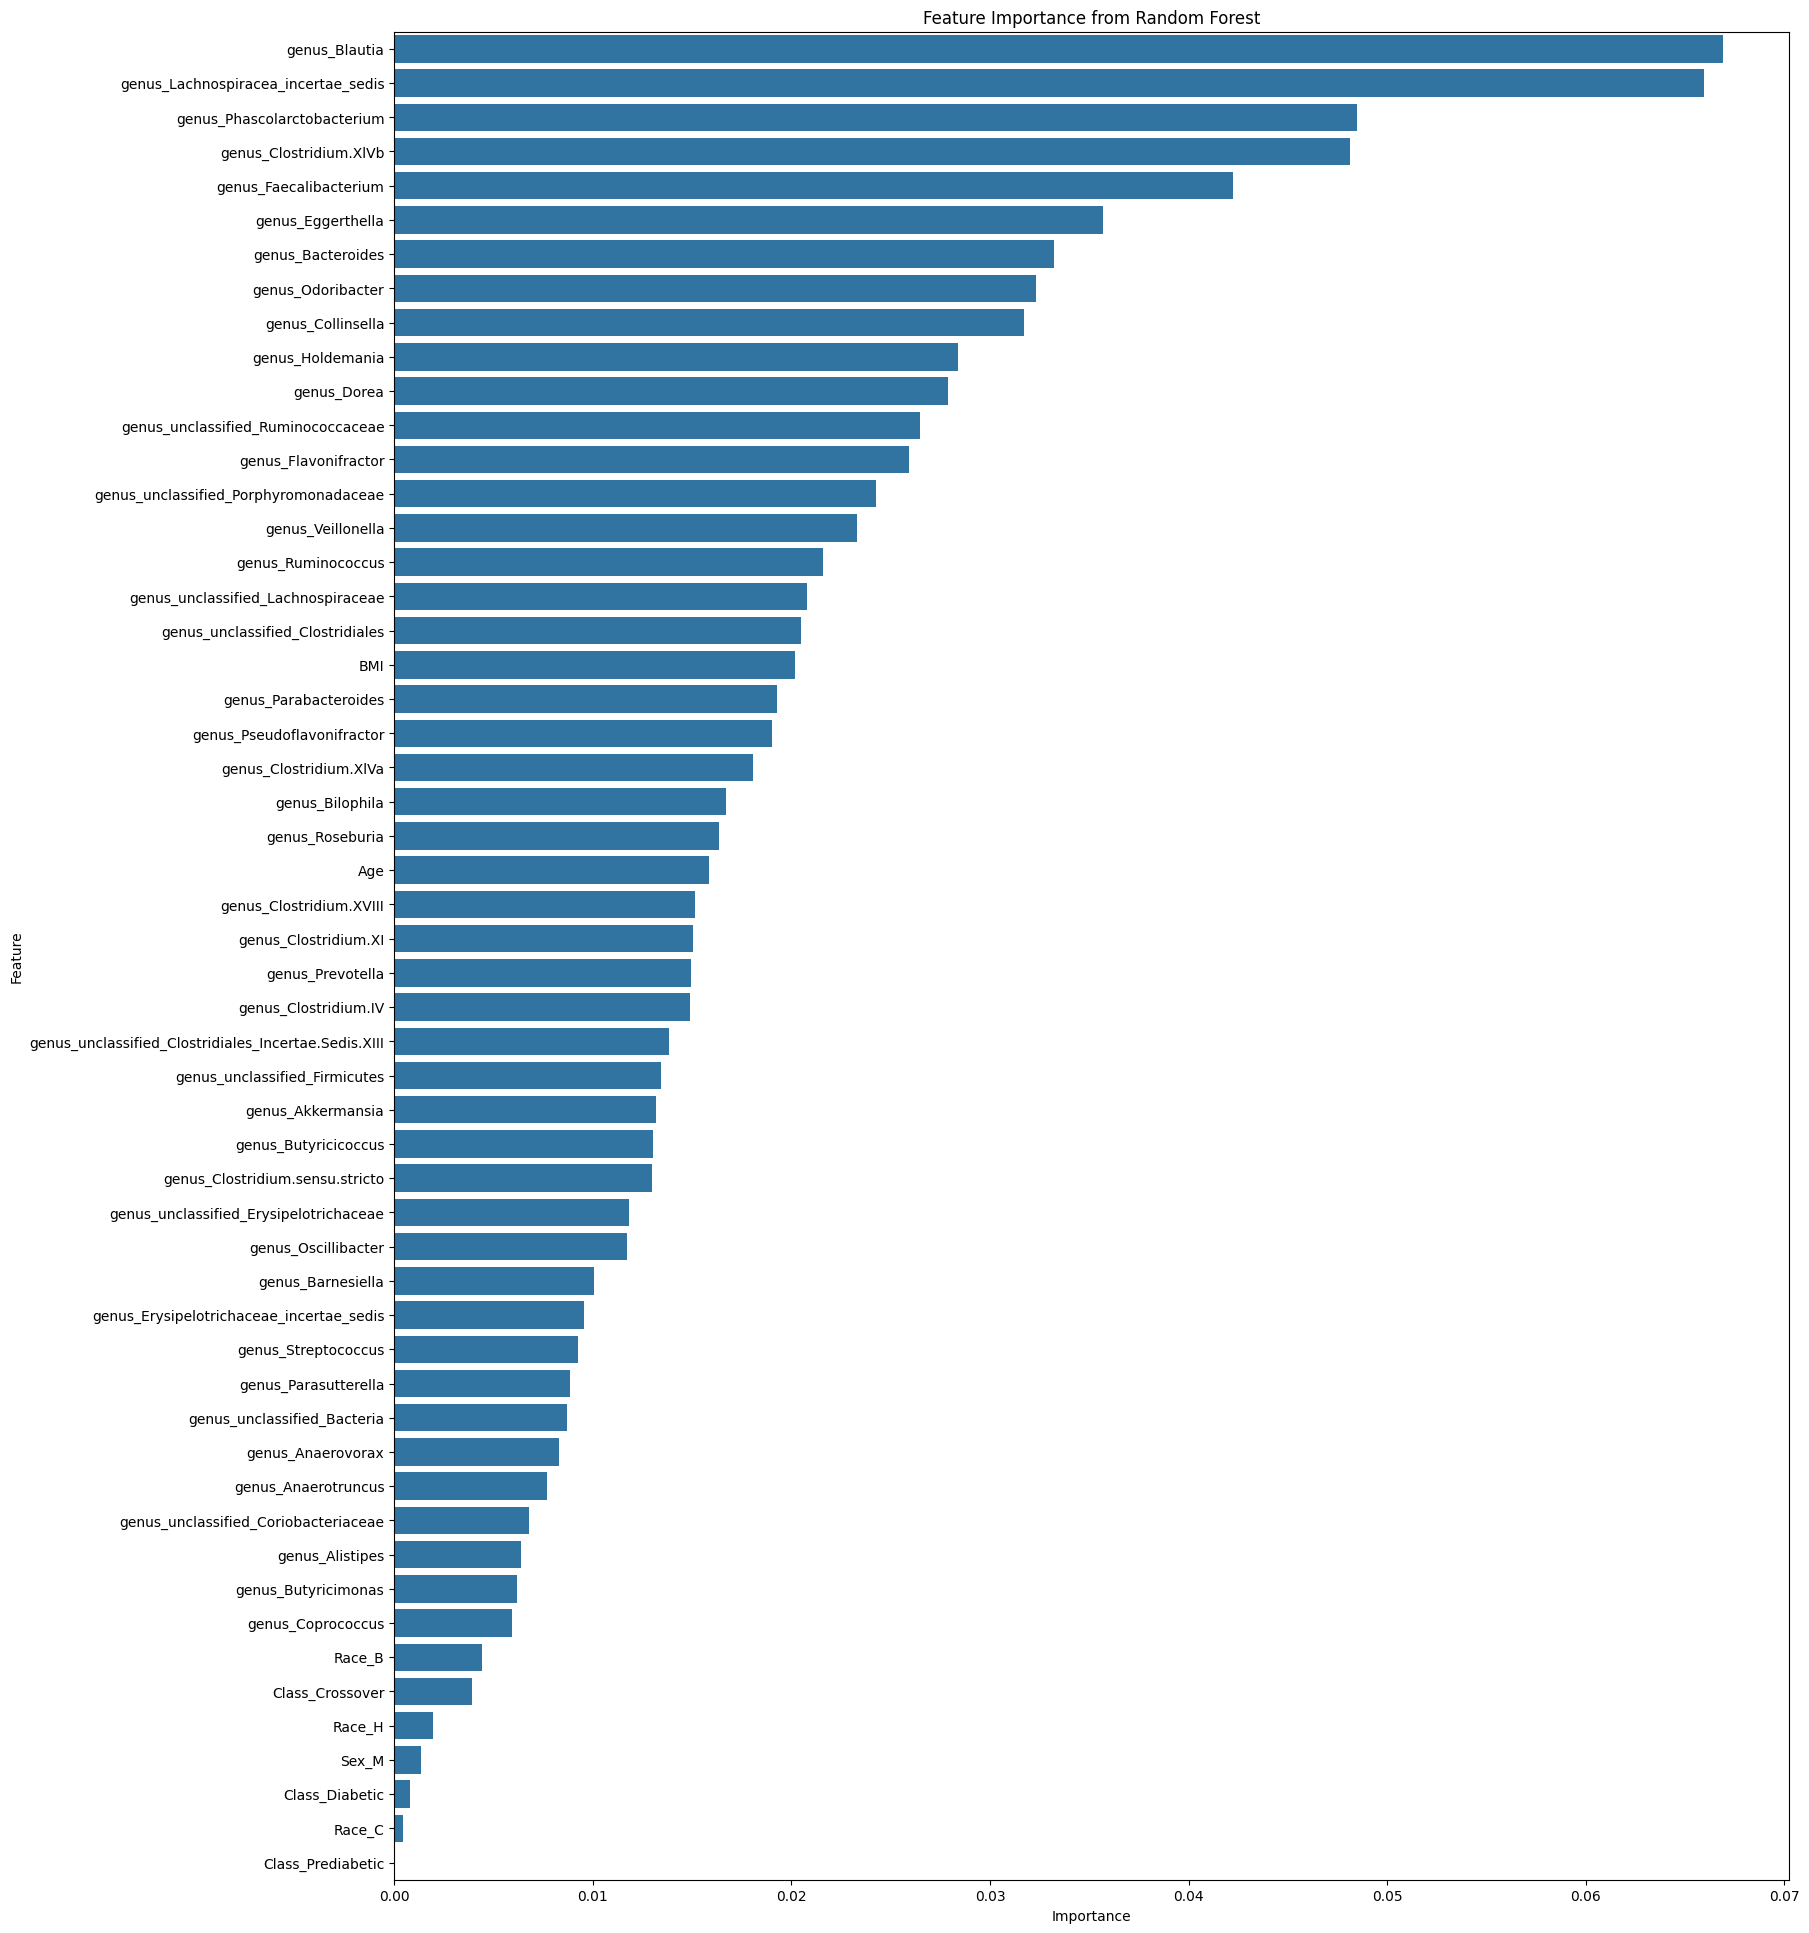

In [ ]:
# Extract feature importance based on the documentation
feature_importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(18, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

Lets try to remove some features from the dataset and see if we can improve the accuracy of the model. Lets start with removing features with a lower threshold of 0.005

In [ ]:
# A threshold for feature importance
threshold = 0.005
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the model
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)


y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Accuracy with reduced features: {accuracy_score(y_test, y_pred_reduced):.4f}")
print("\nClassification Report with reduced features:\n", classification_report(y_test, y_pred_reduced))

Accuracy with reduced features: 0.7500

Classification Report with reduced features:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         6
         1.0       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



In [ ]:
# A threshold for feature importance again to see if it changes anything
threshold = 0.015
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Accuracy with reduced features: {accuracy_score(y_test, y_pred_reduced):.4f}")
print("\nClassification Report with reduced features:\n", classification_report(y_test, y_pred_reduced))

Accuracy with reduced features: 0.6667

Classification Report with reduced features:
               precision    recall  f1-score   support

         0.0       0.62      0.83      0.71         6
         1.0       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



In [ ]:
# A threshold for feature importance one last time!
threshold = 0.020
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Accuracy with reduced features: {accuracy_score(y_test, y_pred_reduced):.4f}")
print("\nClassification Report with reduced features:\n", classification_report(y_test, y_pred_reduced))

Accuracy with reduced features: 0.7500

Classification Report with reduced features:
               precision    recall  f1-score   support

         0.0       0.71      0.83      0.77         6
         1.0       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



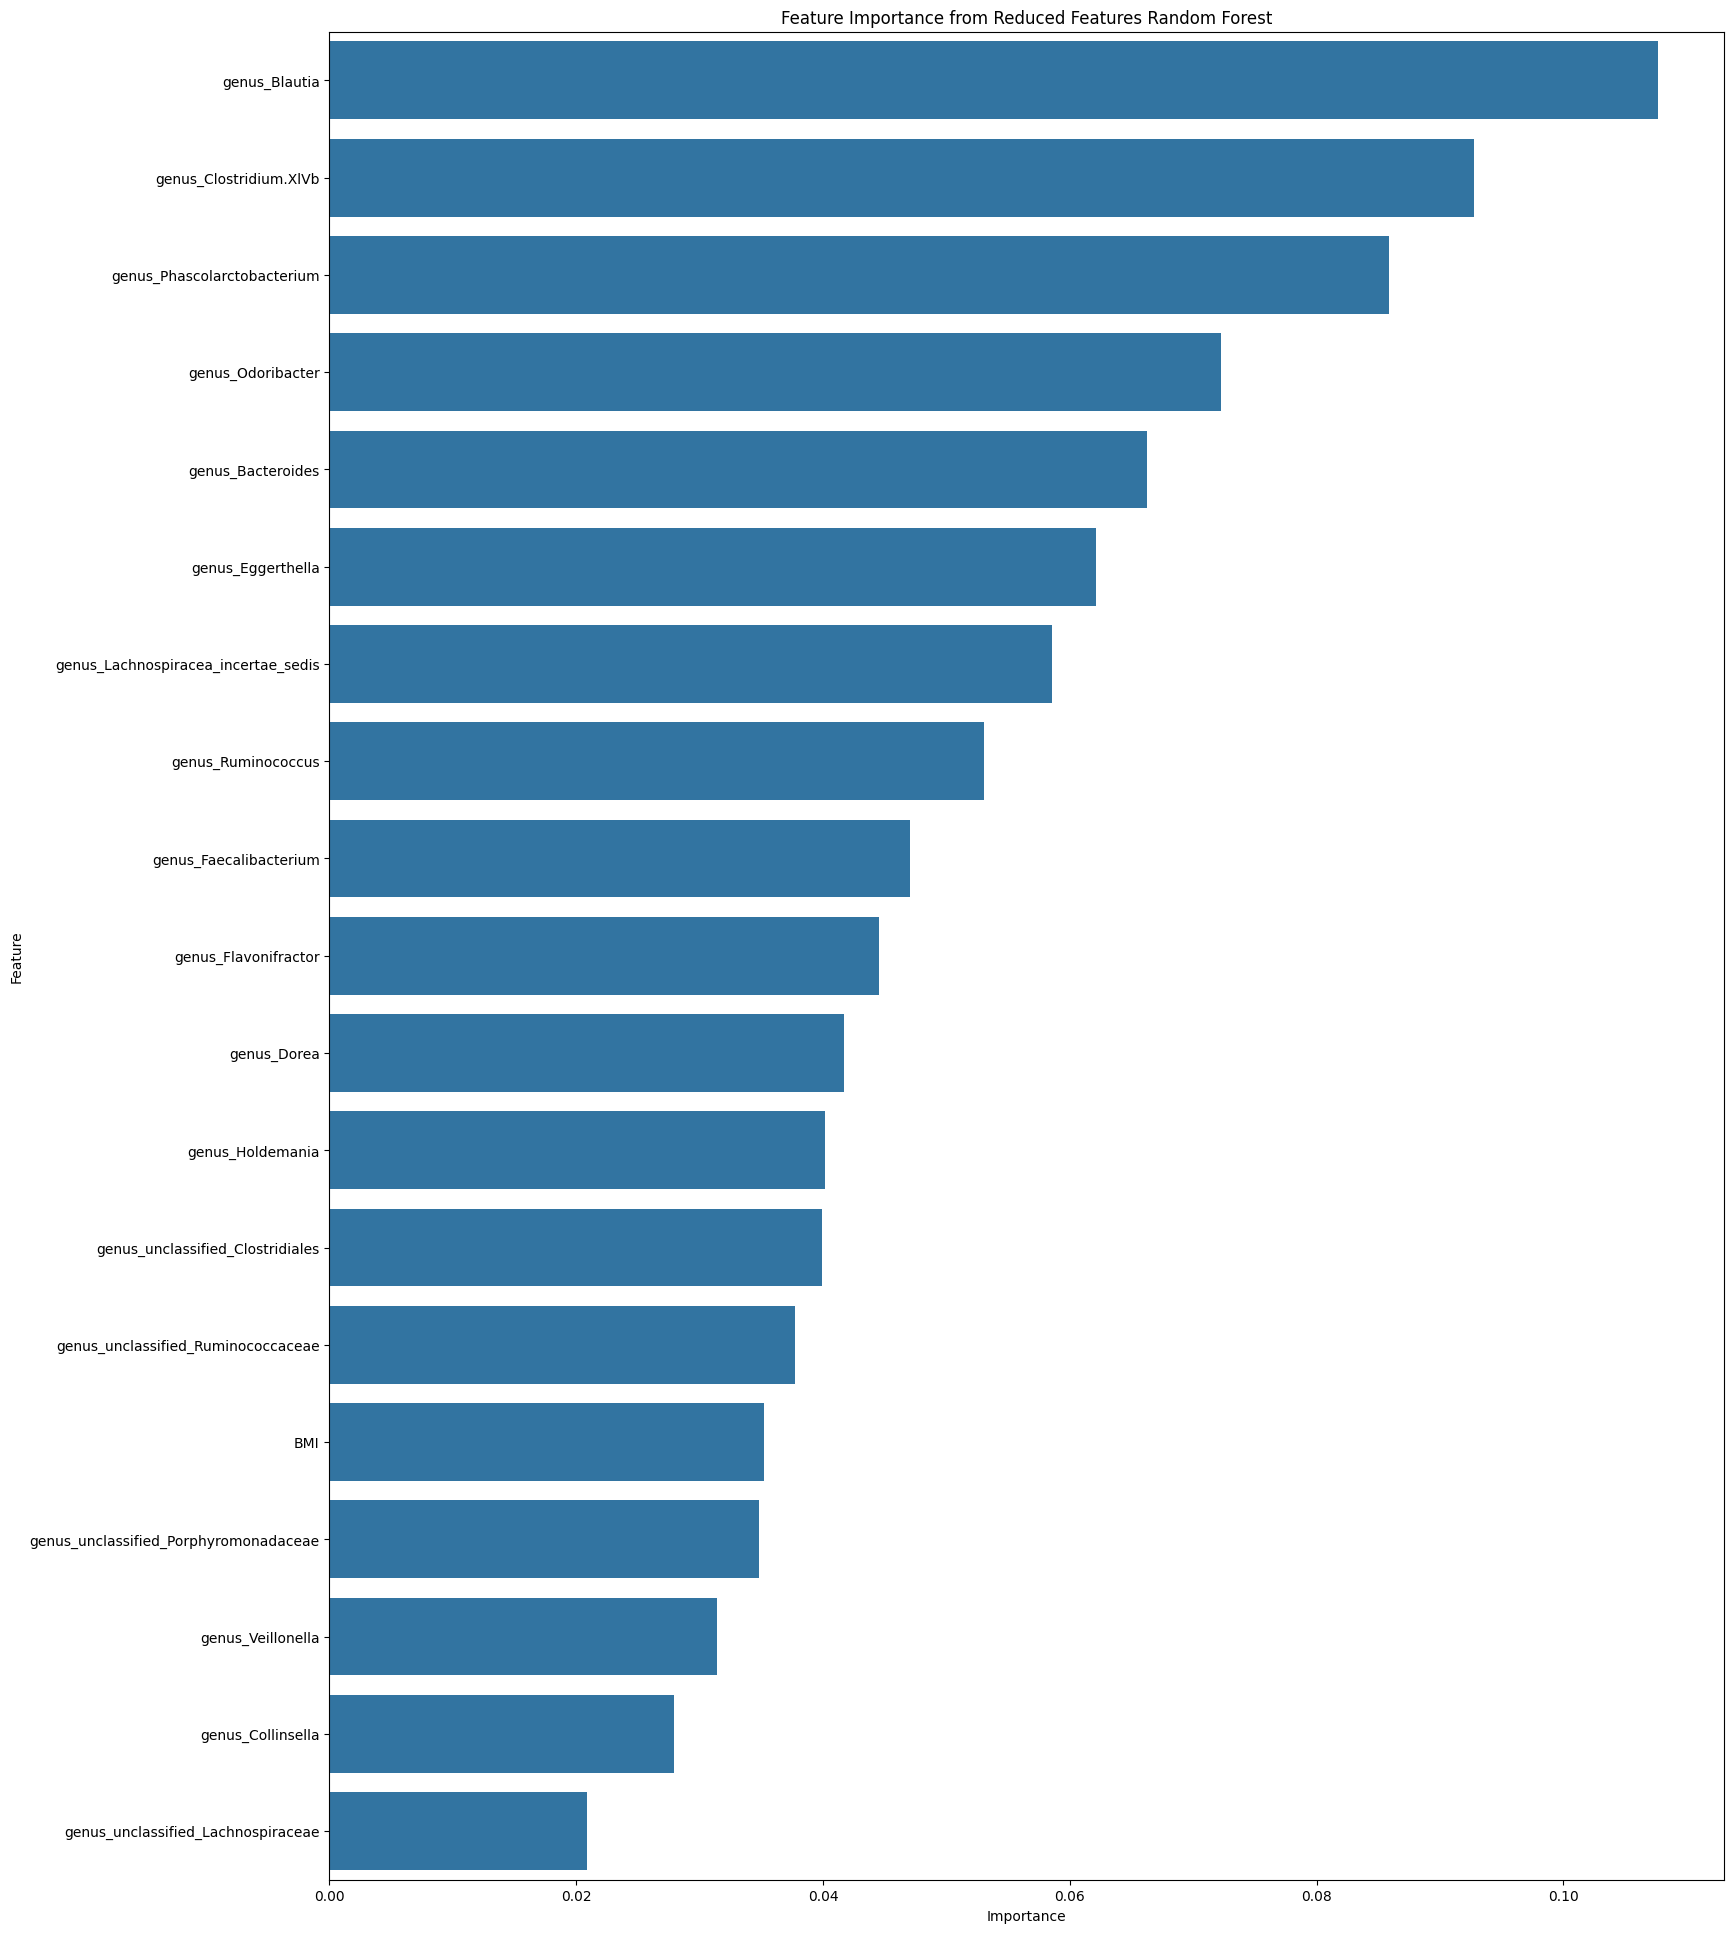

In [ ]:
feature_importance = rf_model_reduced.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': feature_importance
})

# Sort by feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(18, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Reduced Features Random Forest')
plt.show()

Apparently the features are not noise or that the features are redundant. Need some thoughts on this

In [ ]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
print(f"Accuracy with tuned model: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report with tuned model:\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

In [ ]:
# Cross-validation on the best-tuned model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.7444 ± 0.0516


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest on the SMOTE-adjusted dataset
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_smote = rf_model_smote.predict(X_test)
print(f"Accuracy with SMOTE: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\nClassification Report with SMOTE:\n", classification_report(y_test, y_pred_smote))

Accuracy with SMOTE: 0.7500

Classification Report with SMOTE:
               precision    recall  f1-score   support

         0.0       0.71      0.83      0.77         6
         1.0       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



#### Baseline with all the Microbiome Data for First Visits

In [ ]:
cv_scores_smote = cross_val_score(rf_model_smote, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Accuracy with SMOTE: {cv_scores_smote.mean():.4f} ± {cv_scores_smote.std():.4f}")

Cross-Validation Accuracy with SMOTE: 0.7127 ± 0.1319


Not so well with the cross validation. Need to discuss this

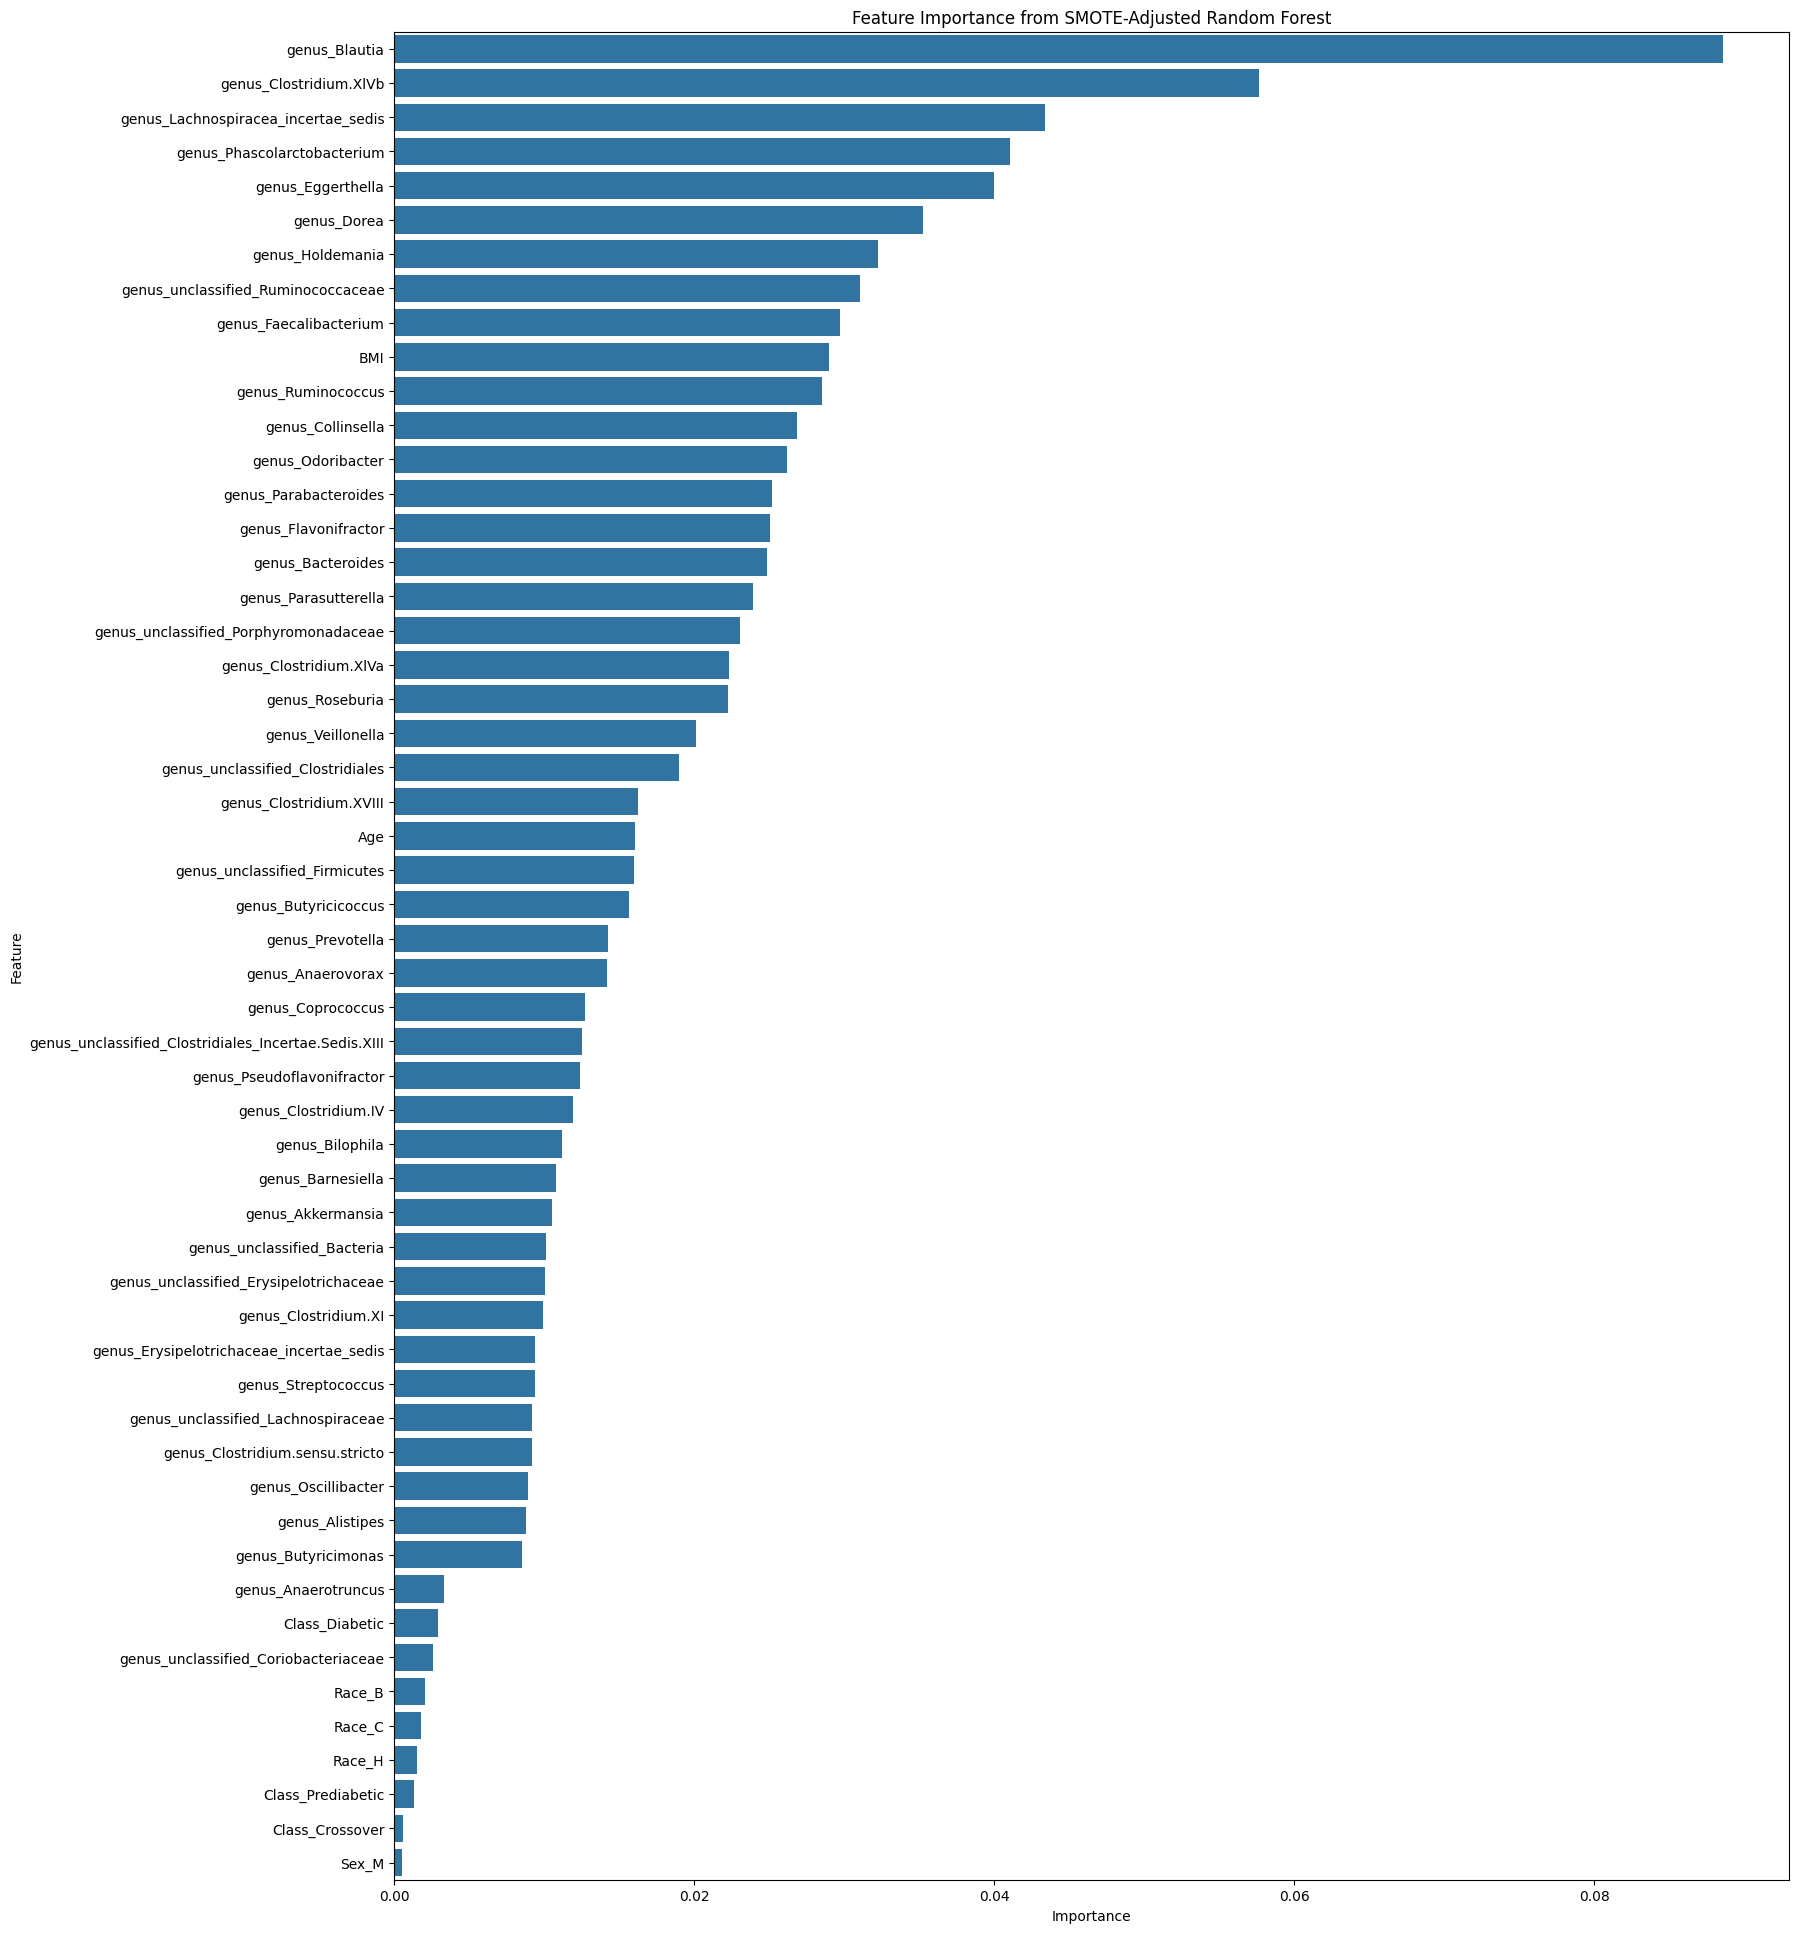

In [ ]:
feature_importance_smote = rf_model_smote.feature_importances_
importance_df_smote = pd.DataFrame({
    'Feature': X_train.columns,  # Use original feature set
    'Importance': feature_importance_smote
})
importance_df_smote = importance_df_smote.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(18, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df_smote)
plt.title('Feature Importance from SMOTE-Adjusted Random Forest')
plt.show()

Effects of SMOTE: Microbiome datasets often have unbalanced classes, whereby one condition (for example a particular disease state) is less represented than another (like healthy state). Synthetic Minority Over-Sampling Technique (SMOTE) that generates artificial samples on the smaller class balances this data set. This way, it can develop an even-handed model that can learn from both.

Since SMOTE significantly improved our model’s performance, it therefore means that our initial microbiome data had an imbalance problem and hence there was a bias in how the model learned. Random Forest model benefited from application of SMOTE as it was able to detect patterns in the minority class more effectively thereby enabling more precise and generalizable predictions.

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4466 - loss: 1.0422
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7138 - loss: 0.6501  
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.9926 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 0.6627 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6259 - loss: 0.5817 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.5345 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.4722 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.5198  
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.3610  
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4314 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - loss: 0.3572 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

Text(0.5, 1.0, 'Neural Network Precision-Recall Curve')

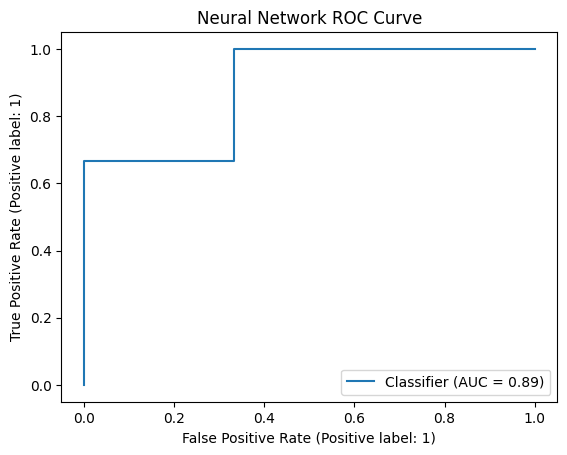

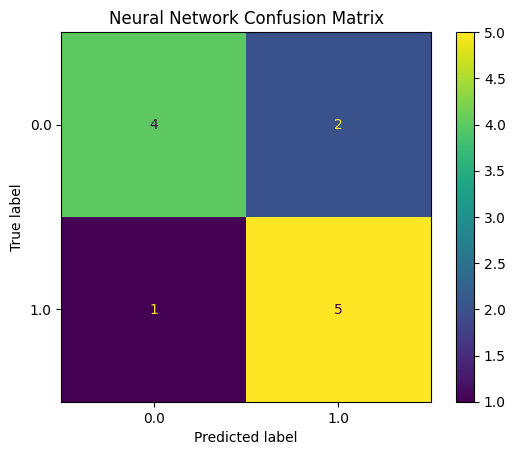

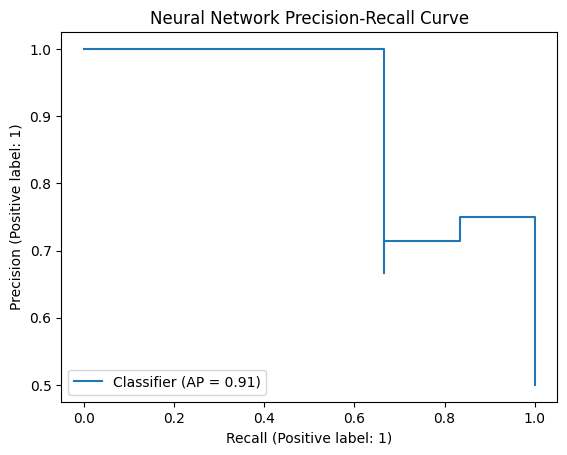

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


# Define a simple neural network model for binary classification
nn_model = Sequential()
nn_model.add(Input(shape=(X_train.shape[1],)))  # Input layer specifying input shape
nn_model.add(Dense(64, activation='relu'))
#nn_model.add(Dropout(0.5))  # Dropout layer added
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=3, verbose=1)

# Evaluate the model
score_train_NN = nn_model.evaluate(X_train, y_train, verbose=0)[1]
score_test_NN = nn_model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Neural Network Train Accuracy: {score_train_NN}")
print(f"Neural Network Test Accuracy: {score_test_NN}")

# Predictions for the neural network
y_prob_NN = nn_model.predict(X_test).flatten()
y_pred_NN = (y_prob_NN > 0.5).astype(int)

print("Neural Network Predictions:", y_pred_NN)

# ROC curve for Neural Network
RocCurveDisplay.from_predictions(y_test, y_prob_NN)
plt.title('Neural Network ROC Curve')
#plt.show()

# Confusion Matrix for Neural Network
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NN)
plt.title('Neural Network Confusion Matrix')
#plt.show()

# Precision-Recall curve for Neural Network
PrecisionRecallDisplay.from_predictions(y_test, y_prob_NN)
plt.title('Neural Network Precision-Recall Curve')
#plt.show()


## Cross Validation including SVM and NN (without SSPG)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Assuming X and y are already defined with your data
# X = ... (features)
# y = ... (labels)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize score lists
scores_train_LR, scores_test_LR = [], []
scores_train_KNN, scores_test_KNN = [], []
scores_train_RF, scores_test_RF = [], []
scores_train_SVM, scores_test_SVM = [], []
scores_train_NN, scores_test_NN = [], []

# Perform the cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold} - TRAIN:", train_index, "TEST:", test_index)
    # Splitting the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    # Logistic Regression
    LR = LogisticRegression(random_state=42).fit(X_train, y_train)
    score_tr_LR = LR.score(X_train, y_train)
    score_te_LR = LR.score(X_test, y_test)
    scores_train_LR.append(score_tr_LR)
    scores_test_LR.append(score_te_LR)
    y_pred_LR = LR.predict(X_test)
    print("Logistic Regression Predictions:", y_pred_LR)

    # ROC curve for LR
    y_prob_LR = LR.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression ROC Curve - Fold {fold}')
    plt.show()

    # Confusion Matrix for LR
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
    plt.title(f'Logistic Regression Confusion Matrix - Fold {fold}')
    plt.show()

    # Precision-Recall curve for LR
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression Precision-Recall Curve - Fold {fold}')
    plt.show()

    # KNN
    knn = KNeighborsClassifier().fit(X_train, y_train)
    score_tr_KNN = knn.score(X_train, y_train)
    score_te_KNN = knn.score(X_test, y_test)
    scores_train_KNN.append(score_tr_KNN)
    scores_test_KNN.append(score_te_KNN)
    y_pred_KNN = knn.predict(X_test)
    print("k-NN Predictions:", y_pred_KNN)

    # ROC curve for KNN
    y_prob_KNN = knn.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN ROC Curve - Fold {fold}')
    plt.show()

    # Confusion Matrix for KNN
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
    plt.title(f'k-NN Confusion Matrix - Fold {fold}')
    plt.show()

    # Precision-Recall curve for KNN
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN Precision-Recall Curve - Fold {fold}')
    plt.show()

    # Random Forest
    rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    score_tr_RF = rf.score(X_train, y_train)
    score_te_RF = rf.score(X_test, y_test)
    scores_train_RF.append(score_tr_RF)
    scores_test_RF.append(score_te_RF)
    y_pred_RF = rf.predict(X_test)
    print("Random Forest Predictions:", y_pred_RF)

    # ROC curve for RF
    y_prob_RF = rf.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest ROC Curve - Fold {fold}')
    plt.show()

    # Confusion Matrix for RF
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)
    plt.title(f'Random Forest Confusion Matrix - Fold {fold}')
    plt.show()

    # Precision-Recall curve for RF
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest Precision-Recall Curve - Fold {fold}')
    plt.show()

    # SVM
    svm = SVC(probability=True, random_state=42, C=0.1, gamma=0.1, kernel='sigmoid').fit(X_train, y_train)
    score_tr_SVM = svm.score(X_train, y_train)
    score_te_SVM = svm.score(X_test, y_test)
    scores_train_SVM.append(score_tr_SVM)
    scores_test_SVM.append(score_te_SVM)
    y_pred_SVM = svm.predict(X_test)
    print("SVM Predictions:", y_pred_SVM)

    # ROC curve for SVM
    y_prob_SVM = svm.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_SVM)
    plt.title(f'SVM ROC Curve - Fold {fold}')
    plt.show()

    # Confusion Matrix for SVM
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM)
    plt.title(f'SVM Confusion Matrix - Fold {fold}')
    plt.show()

    # Precision-Recall curve for SVM
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_SVM)
    plt.title(f'SVM Precision-Recall Curve - Fold {fold}')
    plt.show()

    # Neural Network
    nn_model = Sequential()
    nn_model.add(Input(shape=(X_train.shape[1],)))  # Input layer specifying input shape
    nn_model.add(Dense(64, activation='relu'))
    nn_model.add(Dense(32, activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    nn_model.fit(X_train, y_train, epochs=50, batch_size=3, verbose=1)

    # Evaluate the model
    score_tr_NN = nn_model.evaluate(X_train, y_train, verbose=0)[1]
    score_te_NN = nn_model.evaluate(X_test, y_test, verbose=0)[1]
    scores_train_NN.append(score_tr_NN)
    scores_test_NN.append(score_te_NN)

    print(f"Neural Network Train Accuracy: {score_tr_NN}")
    print(f"Neural Network Test Accuracy: {score_te_NN}")

    # Predictions for the neural network
    y_prob_NN = nn_model.predict(X_test).flatten()
    y_pred_NN = (y_prob_NN > 0.5).astype(int)

    print("Neural Network Predictions:", y_pred_NN)

    # ROC curve for Neural Network
    RocCurveDisplay.from_predictions(y_test, y_prob_NN)
    plt.title(f'Neural Network ROC Curve - Fold {fold}')
    plt.show()

    # Confusion Matrix for Neural Network
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NN)
    plt.title(f'Neural Network Confusion Matrix - Fold {fold}')
    plt.show()

    # Precision-Recall curve for Neural Network
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_NN)
    plt.title(f'Neural Network Precision-Recall Curve - Fold {fold}')
    plt.show()

# Printing the mean scores
print()
print("LR Mean train score:", np.mean(scores_train_LR))
print("LR Mean test score:", np.mean(scores_test_LR))
print()
print("KNN Mean train score:", np.mean(scores_train_KNN))
print("KNN Mean test score:", np.mean(scores_test_KNN))
print()
print("RF train score:", np.mean(scores_train_RF))
print("RF Mean test score:", np.mean(scores_test_RF))
print()
print("SVM Mean train score:", np.mean(scores_train_SVM))
print("SVM Mean test score:", np.mean(scores_test_SVM))
print()
print("NN Mean train score:", np.mean(scores_train_NN))
print("NN Mean test score:", np.mean(scores_test_NN))


Fold 1 - TRAIN: [ 1  2  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29
 30 31 32 33 35 36 37 38 39 40 41 42 43 44 46 48 50 51 52 54 55 56 58] TEST: [ 0  3  5 12 13 25 34 45 47 49 53 57]


KeyError: "None of [Index([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22,\n       23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42,\n       43, 44, 46, 48, 50, 51, 52, 54, 55, 56, 58],\n      dtype='int64')] are in the [columns]"

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5059 - loss: 2.3957
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4954 - loss: 1.0850 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - loss: 0.7224 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - loss: 0.7001 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7249 - loss: 0.6338 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.6113 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.5331 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 0.4647 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.3559 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.3687 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3152 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

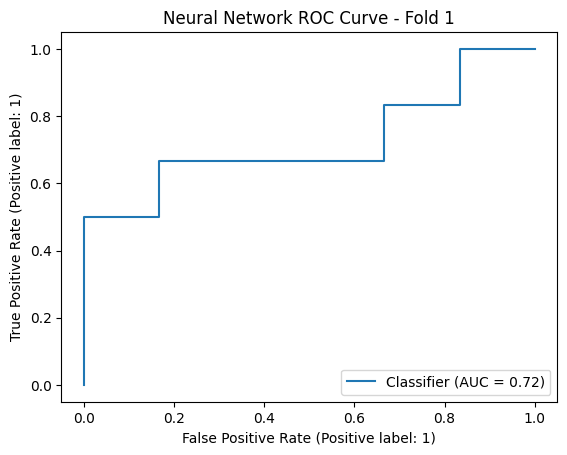

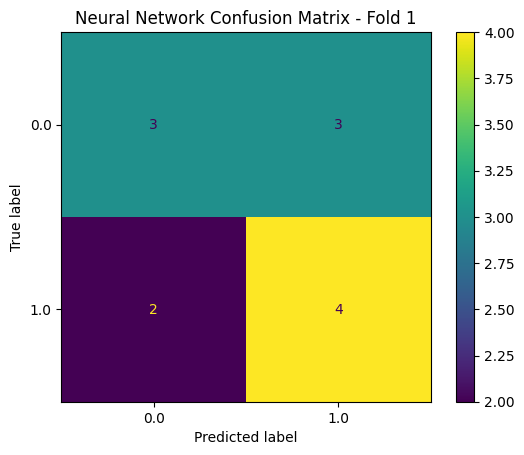

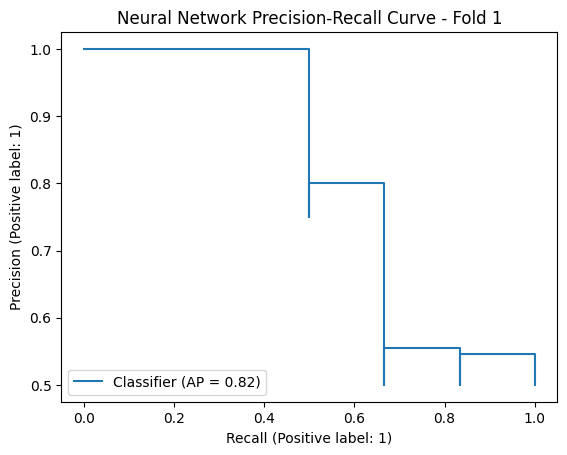

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Neural Network
nn_model = Sequential()
nn_model.add(Input(shape=(X_train.shape[1],)))  # Input layer specifying input shape
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=3, verbose=1)

# Evaluate the model
score_tr_NN = nn_model.evaluate(X_train, y_train, verbose=0)[1]
score_te_NN = nn_model.evaluate(X_test, y_test, verbose=0)[1]
scores_train_NN.append(score_tr_NN)
scores_test_NN.append(score_te_NN)

print(f"Neural Network Train Accuracy: {score_tr_NN}")
print(f"Neural Network Test Accuracy: {score_te_NN}")

# Predictions for the neural network
y_prob_NN = nn_model.predict(X_test).flatten()
y_pred_NN = (y_prob_NN > 0.5).astype(int)

print("Neural Network Predictions:", y_pred_NN)

# ROC curve for Neural Network
RocCurveDisplay.from_predictions(y_test, y_prob_NN)
plt.title(f'Neural Network ROC Curve - Fold {fold}')
plt.show()

# Confusion Matrix for Neural Network
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NN)
plt.title(f'Neural Network Confusion Matrix - Fold {fold}')
plt.show()

# Precision-Recall curve for Neural Network
PrecisionRecallDisplay.from_predictions(y_test, y_prob_NN)
plt.title(f'Neural Network Precision-Recall Curve - Fold {fold}')
plt.show()


In [ ]:
model.save('gut_microbiome_nn.h5')


NameError: name 'model' is not defined

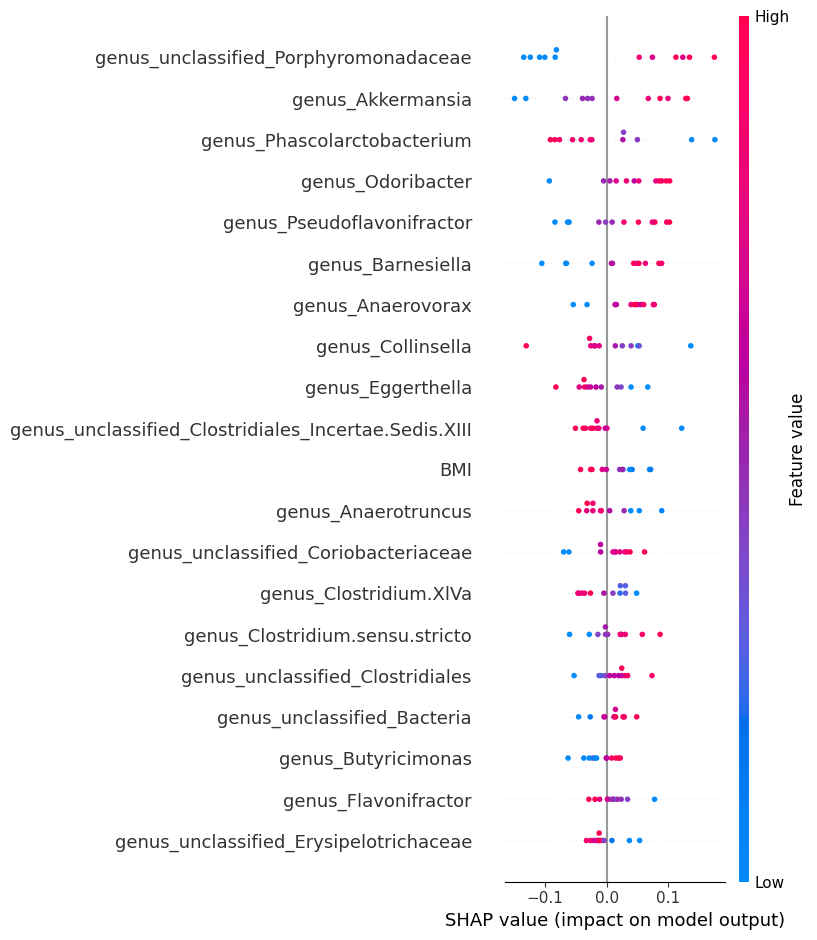

In [ ]:
import shap

# Define the masker for tabular data
masker = shap.maskers.Independent(X_train)

# Create the SHAP explainer with the neural network model and the masker
explainer = shap.Explainer(nn_model, masker=masker)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Optionally, visualize the SHAP values
shap.summary_plot(shap_values, X_test)



In [ ]:
import shap

# Create an explainer for your model
explainer = shap.KernelExplainer(nn_model.predict, X_train)  # X could be a sample from your dataset
shap_values = explainer.shap_values(X_train)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


  0%|          | 0/47 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

IndexError: index 47 is out of bounds for axis 0 with size 47

In [ ]:
shap_values = explainer.shap_values(X_train)

  0%|          | 0/47 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
# Visualize the effect of a single feature
shap.dependence_plot(4, shap_values, X_train)  # 0 is the index of the feature

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 4

In [ ]:
# Example for a specific feature using the feature name:
shap.dependence_plot('genus_Akkermansia', shap_values, X_train)

# Example for a specific feature using the feature index:
shap.dependence_plot(feature_index, shap_values, X_train)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 4